In [26]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving 2025_movies_dataset.csv to 2025_movies_dataset (3).csv


# Initial Data Downloads
Read the CSV, get the columns from it that we need

In [27]:
df = pd.read_csv('/content/2025_movies_dataset.csv')
# Trim the panda
movies_df = df[['Title', 'Duration', 'Rating', 'description', 'Movie Link', 'stars', 'genres']]
pd.set_option('display.max_rows', None)


# Clean the data
1.   Drop rows that have na values
2.   Drop movies with ratings under 5
3.   Remove the index number that comes with every movie title



In [28]:
movies_df = movies_df.dropna()
movies_df = movies_df.reset_index(drop=True)
# Drop movies that are poorly rated
for i, row in movies_df.iterrows():
  rating = float(row['Rating'])
  if rating < 5:
    movies_df.drop(i, inplace=True)
movies_df = movies_df.reset_index(drop=True)

import re

for i, row in movies_df.iterrows():
 title = str(row['Title'])
 # Only want to remove the index number in the title
 # Had to be careful here because some movie titles are purely integer numbers
 # Only want to remove FIRST num and the period
 title = re.sub(r'^\d+\s*', '', title)
 title = re.sub(r'\.', '', title)
 title = title.strip()
 movies_df.at[i, 'Title'] = title

movies_df


,Title,Duration,Rating,description,Movie Link,stars,genres
0,Captain America: Brave New World,1h 58m,5.9,"Sam Wilson, the new Captain America, finds him...",https://www.imdb.com/title/tt14513804/?ref_=sr...,"['Anthony Mackie', 'Harrison Ford', 'Danny Ram...","['Action Epic', 'Adventure Epic', 'Sci-Fi Epic..."
1,Dog Man,1h 29m,6.3,"Dog Man, half dog and half man, he is sworn to...",https://www.imdb.com/title/tt10954718/?ref_=sr...,"['Pete Davidson', 'Poppy Liu', 'Lil Rel Howery...","['Animal Adventure', 'Computer Animation', 'Su..."
2,One of Them Days,1h 37m,6.6,When best friends and roommates Dreux and Alys...,https://www.imdb.com/title/tt32221196/?ref_=sr...,"['Keke Palmer', 'SZA', 'Vanessa Bell Calloway'...","['Buddy Comedy', 'Comedy']"
3,Mickey 17,2h 17m,7.0,"Mickey 17, known as an ""expendable,"" goes on a...",https://www.imdb.com/title/tt12299608/?ref_=sr...,"['Robert Pattinson', 'Steven Yeun', 'Michael M...","['Alien Invasion', 'Dark Comedy', 'Space Sci-F..."
4,The Monkey,1h 38m,6.3,When twin brothers Bill and Hal find their fat...,https://www.imdb.com/title/tt27714946/?ref_=sr...,"['Theo James', 'Tatiana Maslany', 'Christian C...","['Dark Comedy', 'Splatter Horror', 'Horror']"
5,Den of Thieves: Pantera,2h 24m,6.3,Big Nick is back on the hunt in Europe and clo...,https://www.imdb.com/title/tt8008948/?ref_=sr_i_7,"['Gerard Butler', ""O'Shea Jackson Jr."", 'Evin ...","['Action', 'Crime', 'Drama', 'Thriller']"
6,Heart Eyes,1h 37m,6.1,"For the past several years, the ""Heart Eyes Ki...",https://www.imdb.com/title/tt32558992/?ref_=sr...,"['Mason Gooding', 'Olivia Holt', 'Gigi Zumbado...","['Dark Comedy', 'Slasher Horror', 'Splatter Ho..."
7,Flight Risk,1h 31m,5.3,A pilot transports an Air Marshal accompanying...,https://www.imdb.com/title/tt10078772/?ref_=sr...,"['Michelle Dockery', 'Mark Wahlberg', 'Topher ...","['Action', 'Crime', 'Drama', 'Thriller']"
8,Companion,1h 37m,7.0,A weekend getaway with friends at a remote cab...,https://www.imdb.com/title/tt26584495/?ref_=sr...,"['Sophie Thatcher', 'Jack Quaid', 'Lukas Gage'...","['Artificial Intelligence', 'Dark Comedy', 'Ps..."
9,Wolf Man,1h 43m,5.6,A family at a remote farmhouse is attacked by ...,https://www.imdb.com/title/tt4216984/?ref_=sr_...,"['Christopher Abbott', 'Julia Garner', 'Matild...","['Body Horror', 'Werewolf Horror', 'Horror']"


# More Data cleaning
Remove improperly formatted data

Remove the spaces between actors names (We only want to match Harrison Ford exactly, we dont want to match every Harrison and every Ford)

1.   Remove improperly formatted data
2.   Remove the spaces between actors names (We only want to match Harrison Ford exactly, we dont want to match every Harrison and every Ford)



In [29]:
# Some Duration values only had chars, such as 'R'
# Remove them if they dont have any numbers
movies_df = movies_df[movies_df['Duration'].str.contains(r'\d', na=False)]
movies_df = movies_df.reset_index(drop=True)

for i, row in movies_df.iterrows():
  # Turn the stars names into one word, such as HarrisonFord
  actors = str(row['stars'])
  actors = actors.replace(' ', '')
  movies_df.at[i, 'stars'] = actors


# Create a minutes column for the movie duration
Will make computations easier later. Turns the string into a minutes number

In [30]:
for i, row in movies_df.iterrows():
  duration = str(row['Duration'])
  nums = duration.split('h')
  hours = 0
  minutes = 0

  # Have to handle situations such as a movie being less than 1 hour
  if 'm' in nums[0]:
    # Hours stays at the default of 0. Set mins only
    minutes = int(nums[0].replace('m', ''))
  # If 'm' is in the 2nd value, we know there's an hours value we can get
  elif 'm' in nums[1]:
    hours = int(nums[0])
    minutes = int(nums[1].replace('m', ''))
  # Special case such as 2h movie. No mins
  elif 'm' not in nums[1]:
    hours = int(nums[0])

  duration_minutes = hours * 60 + minutes
  movies_df.at[i, 'Duration(mins)'] = duration_minutes

pd.set_option('display.max_rows', None)
movies_df = movies_df.reset_index(drop=True)


# Create a movie_traits column
This will have a string containing the movies' genres and actors. Needed to clean up the string a bit to only get the words from it

In [31]:
def clean_column(column_string):
  """
  Removes and replaces symbols from a string.

  Parameters
  ----------
  column_string : The string to clean.

  Returns
  -------
  The updated string.

  """
  column_string = column_string.replace('[', '')
  column_string = column_string.replace(']', '')
  column_string = column_string.replace("'", '')
  column_string = column_string.replace(',', ' ')
  return column_string

# Clean my column data
stars_list = []
for i, row in movies_df.iterrows():
  genre = row['genres']
  genre = clean_column(genre)
  movies_df.at[i, 'genres'] = genre
  stars = row['stars']
  stars = clean_column(stars)
  movies_df.at[i, 'stars'] = stars

movies_df['movie_traits'] = movies_df['genres'] + ' ' + movies_df['stars']
movies_df.head()

,Title,Duration,Rating,description,Movie Link,stars,genres,Duration(mins),movie_traits
0,Captain America: Brave New World,1h 58m,5.9,"Sam Wilson, the new Captain America, finds him...",https://www.imdb.com/title/tt14513804/?ref_=sr...,AnthonyMackie HarrisonFord DannyRamirez ShiraH...,Action Epic Adventure Epic Sci-Fi Epic Supe...,118.0,Action Epic Adventure Epic Sci-Fi Epic Supe...
1,Dog Man,1h 29m,6.3,"Dog Man, half dog and half man, he is sworn to...",https://www.imdb.com/title/tt10954718/?ref_=sr...,PeteDavidson PoppyLiu LilRelHowery IslaFisher ...,Animal Adventure Computer Animation Superher...,89.0,Animal Adventure Computer Animation Superher...
2,One of Them Days,1h 37m,6.6,When best friends and roommates Dreux and Alys...,https://www.imdb.com/title/tt32221196/?ref_=sr...,KekePalmer SZA VanessaBellCalloway LilRelHower...,Buddy Comedy Comedy,97.0,Buddy Comedy Comedy KekePalmer SZA VanessaBel...
3,Mickey 17,2h 17m,7.0,"Mickey 17, known as an ""expendable,"" goes on a...",https://www.imdb.com/title/tt12299608/?ref_=sr...,RobertPattinson StevenYeun MichaelMonroe Patsy...,Alien Invasion Dark Comedy Space Sci-Fi Adv...,137.0,Alien Invasion Dark Comedy Space Sci-Fi Adv...
4,The Monkey,1h 38m,6.3,When twin brothers Bill and Hal find their fat...,https://www.imdb.com/title/tt27714946/?ref_=sr...,"TheoJames TatianaMaslany ChristianConvery ""Col...",Dark Comedy Splatter Horror Horror,98.0,Dark Comedy Splatter Horror Horror TheoJames...


# Get the users ideal movie duration
Will create a duration range based on their input. Later on, will remove movie options that are too far out of their target duration range.

In [32]:
def get_ideal_duration():
  """
  Gets the user input for how long their ideal movie length is.

  Returns
  -------
  The user's ideal movie length. First nuber is hours, second number is minutes.

  """
  # Set the range for how much higher AND lower the target duration will be
  # For instance, say the user enters 1 hour as their ideal duration
  # We want the duration range to be between 25 mins and 1hr 45 mins
  DURATION_RANGE = 45
  while True:
    ideal_duration = input('What\'s your ideal movie length? (Type first number as # of hours, second number as # of minutes. 2 0 for 2 hrs and 0 mins)\n')
    nums = ideal_duration.split()
    if len(nums) != 2:
      print('Please enter 2 numbers')
      continue
    elif int(nums[0]) < 0 or int(nums[0]) > 3:
      print('Please enter a realistic number of hours for a movie (0-3)')
      continue
    elif int(nums[1]) < 0 or int(nums[1]) > 60:
      print('Please enter a number of minutes between 0-60')
      continue
    else:
      hours = int(nums[0])
      minutes = int(nums[1])
      duration_minutes = hours * 60 + minutes
      lower_bound = duration_minutes - DURATION_RANGE
      upper_bound = duration_minutes + DURATION_RANGE
      break
  return lower_bound, upper_bound

# Get Users Preferences
Give the user a genre menu and allow them to enter their favorite genres. Then allow them to type in however many favorite actors they want.

In [33]:
def get_fav_genres():
    """
    Gets the user's favorite movie genres.

    Returns
    -------
    The user's favorite movie genres as a string.

    """
    genres_to_add = input('''Enter the numbers that correspond to genres you like. (For example, you would enter 1 8 17 if you wanted to pick
    Action, Drama and Thriller as your favorites)
    1) Action
    2) Adventure
    3) Animation
    4) Biography
    5) Comedy
    6) Crime
    7) Documentary
    8) Drama
    9) Family
    10) Fantasy
    11) Horror
    12) Musical
    13) Mystery
    14) Romance
    15) Sci-Fi
    16) Sport
    17) Thriller
    18) War
    19) Western
    ''')
    fav_genres = ''
    genres_nums = genres_to_add.split()
    for g in genres_nums:
      if g == '1':
        fav_genres += 'Action '
      elif g == '2':
        fav_genres += 'Adventure '
      elif g == '3':
        fav_genres += 'Animation '
      elif g == '4':
        fav_genres += 'Biography '
      elif g == '5':
        fav_genres += 'Comedy '
      elif g == '6':
        fav_genres += 'Crime '
      elif g == '7':
        fav_genres += 'Documentary '
      elif g == '8':
        fav_genres += 'Drama '
      elif g == '9':
        fav_genres += 'Family '
      elif g == '10':
        fav_genres += 'Fantasy '
      elif g == '11':
        fav_genres += 'Horror '
      elif g == '12':
        fav_genres += 'Musical '
      elif g == '13':
        fav_genres += 'Mystery '
      elif g == '14':
        fav_genres += 'Romance '
      elif g == '15':
        fav_genres += 'Sci-Fi '
      elif g == '16':
        fav_genres += 'Sport '
      elif g == '17':
        fav_genres += 'Thriller '
      elif g == '18':
        fav_genres += 'War '
      elif g == '19':
        fav_genres += 'Western '


    return fav_genres.rstrip()


def get_fav_actors():
  """
  Gets the user 's favorite actors.

  Returns
  -------
  The user's favorite actors as a string.

  """
  actors_string = ''
  while True:
    actor = input('Enter one of your favorite actors names (first and last), or enter Q to quit. '
    'Example input: Harrison Ford\n')
    if actor == 'Q' or actor =='q':
      break
    else:
      actor = actor.replace(' ', '')
      actors_string += actor + ' '
  return actors_string.rstrip()


# Compute Recommender based on cosine similarity

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

ideal_duration = get_ideal_duration()
lower_bound = ideal_duration[0]
upper_bound = ideal_duration[1]

# Have the df only have movies within our duration range
movies_df = movies_df[(movies_df['Duration(mins)'] >= lower_bound) & (movies_df['Duration(mins)'] <= upper_bound)]

# Get users preferences
fav_genres = get_fav_genres()
fav_actors = get_fav_actors()
user_preferences = fav_genres + ' ' + fav_actors
print(user_preferences)

cosine_sim_list = []
#movie_traits = []
for i, row in movies_df.iterrows():
  traits = row['movie_traits']
  # Convert strings to TF-IDF vectors
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform([user_preferences, traits])

  # Compute cosine similarity
  cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
  cosine_sim_list.append(cosine_sim[0][0])
movies_df['cosine_sim'] = cosine_sim_list
movies_df = movies_df.sort_values(by=['cosine_sim'], ascending=False)
movies_df = movies_df.reset_index(drop=True)
movies_df.head(3)

What's your ideal movie length? (Type first number as # of hours, second number as # of minutes. 2 0 for 2 hrs and 0 mins)
2 0
Enter the numbers that correspond to genres you like. (For example, you would enter 1 8 17 if you wanted to pick
    Action, Drama and Thriller as your favorites)
    1) Action
    2) Adventure
    3) Animation
    4) Biography
    5) Comedy
    6) Crime
    7) Documentary
    8) Drama
    9) Family
    10) Fantasy
    11) Horror
    12) Musical
    13) Mystery
    14) Romance
    15) Sci-Fi
    16) Sport
    17) Thriller
    18) War
    19) Western
    1 2 3 9
Enter one of your favorite actors names (first and last), or enter Q to quit. Example input: Harrison Ford
Anthony Mackie
Enter one of your favorite actors names (first and last), or enter Q to quit. Example input: Harrison Ford
Jason Momoa
Enter one of your favorite actors names (first and last), or enter Q to quit. Example input: Harrison Ford
Harrison Ford
Enter one of your favorite actors names (firs

,Title,Duration,Rating,description,Movie Link,stars,genres,Duration(mins),movie_traits,cosine_sim
0,Dog Man,1h 29m,6.3,"Dog Man, half dog and half man, he is sworn to...",https://www.imdb.com/title/tt10954718/?ref_=sr...,PeteDavidson PoppyLiu LilRelHowery IslaFisher ...,Animal Adventure Computer Animation Superher...,89.0,Animal Adventure Computer Animation Superher...,0.269637
1,Kayara,1h 30m,6.4,A young Inca girl dreams of joining the all-ma...,https://www.imdb.com/title/tt11846550/?ref_=sr...,NaomiSerrano NateBegle CharlesGonzales KolbeGa...,Action Adventure Animation Family,90.0,Action Adventure Animation Family NaomiSerr...,0.237903
2,Captain America: Brave New World,1h 58m,5.9,"Sam Wilson, the new Captain America, finds him...",https://www.imdb.com/title/tt14513804/?ref_=sr...,AnthonyMackie HarrisonFord DannyRamirez ShiraH...,Action Epic Adventure Epic Sci-Fi Epic Supe...,118.0,Action Epic Adventure Epic Sci-Fi Epic Supe...,0.222032


In [35]:
!pip install emoji

# Time to nicely format and display the top 3 movie matches

YOUR TOP 3 MOVIE MATCHES OF 2025: 

1) Dog Man:


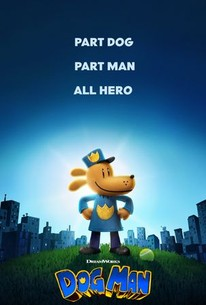

Duration: 1h 29m

Description: Dog Man, half dog and half man, he is sworn to protect and serve
as he doggedly pursues the feline supervillain Petey the Cat.

Rating: 6.3⭐s

Link: https://www.imdb.com/title/tt10954718/?ref_=sr_i_2


2) Kayara:
Movie pic not found
Duration: 1h 30m

Description: A young Inca girl dreams of joining the all-male Chasqui
messenger group. She challenges traditions and gender norms to
pursue her ambition against all odds.

Rating: 6.4⭐s

Link: https://www.imdb.com/title/tt11846550/?ref_=sr_i_279


3) Captain America: Brave New World:


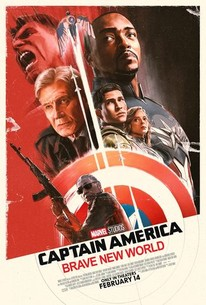

Duration: 1h 58m

Description: Sam Wilson, the new Captain America, finds himself in the middle
of an international incident and must discover the motive behind
a nefarious global plan.

Rating: 5.9⭐s

Link: https://www.imdb.com/title/tt14513804/?ref_=sr_i_1




In [36]:
from os import link
top_three_movie_titles = []
top_three_movie_durations = []
top_three_movie_ratings = []
top_three_movie_descriptions = []
top_three_movie_links = []
for i in range(3):
  top_three_movie_titles.append(movies_df.iloc[i]['Title'])
  top_three_movie_durations.append(movies_df.iloc[i]['Duration'])
  top_three_movie_ratings.append(movies_df.iloc[i]['Rating'])
  top_three_movie_descriptions.append(movies_df.iloc[i]['description'])
  top_three_movie_links.append(movies_df.iloc[i]['Movie Link'])


from bs4 import BeautifulSoup
import requests
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np
import textwrap
import emoji

print('\033[1mYOUR TOP 3 MOVIE MATCHES OF 2025:\033[0m \n')

for i, title in enumerate(top_three_movie_titles):
  movie = title.strip()
  movie = movie.lower()
  movie = movie.replace(' ', '_')
  movie = re.sub(r'[^\w]', '', movie)

  media_tag = '#media-info'

  test_url = f"https://www.rottentomatoes.com/m/{movie}{media_tag}"
  url = ""

  page = requests.get(test_url).text
  doc = BeautifulSoup(page, 'html.parser')

  found_movie_url = False
  release_year = doc.find_all(attrs={'data-qa':'item-value'})
  # Big problem when there's a movie title that overlaps with a movie that was
  # released a long time ago. For instance /sinners goes to a 1989 movie
  # Want the 2025 one
  # Search the media-info text for the release year.
  # If 2025 is found, we have the correct movie URL
  # If 2025 isnt found, we have a url with an old movie. Need _2025 added to URL
  release_year_exists = False
  find_year = doc.find_all(attrs={'class':'key', 'data-qa':'item-label'})
  for y in find_year:
    text = y.text
    text = text.lower()
    phrase = 'release date'
    if phrase in text:
        release_year_exists = True

  if release_year_exists:
    found_movie_url = False
    release_year = doc.find_all(attrs={'data-qa':'item-value'})
    for item in release_year:
      target_year = '2025'
      text = item.text.strip()
      if target_year in text:
          found_movie_url = True

  if found_movie_url:
      url = f"https://www.rottentomatoes.com/m/{movie}"
  else:
      url = f"https://www.rottentomatoes.com/m/{movie}_2025"


  # Print the movie title and ranking for the user
  title = top_three_movie_titles[i]
  print(f'\033[1m{i + 1})\033[0m \033[4m{title}\033[0m:')

  # Try and find the movie cover pic fro Rotten Tomatoes

  page = requests.get(url).text
  doc = BeautifulSoup(page, 'html.parser')
  movie_pic = doc.find(attrs={'alt':'poster image'})
  try:
    movie_pic = movie_pic['src']

    req = urllib.request.urlopen(movie_pic)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    # Save the image
    cv2.imwrite('Movie.png', img)
    # Display the image
    display_img = cv2.imread('Movie.png', img)
    cv2_imshow(display_img)
  except:
    print('Movie pic not found')

  duration = top_three_movie_durations[i]
  description = top_three_movie_descriptions[i]
  width = 65
  wrapped_text = textwrap.fill(description, width)
  rating = top_three_movie_ratings[i]
  link = top_three_movie_links[i]
  print(f'\033[1mDuration:\033[0m {duration}')
  print()
  print(f'\033[1mDescription:\033[0m {wrapped_text}')
  print()
  stars = emoji.emojize(':star:')
  print(f'\033[1mRating:\033[0m {rating}{stars}s')
  print()
  print(f'\033[1mLink:\033[0m {link}')
  print('\n')
